In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LOAD THE DATASET

In [2]:
# Load the dataset
data = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

# Display the first few rows of the dataset
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


Data Preprocessing

In [3]:
# Check for missing values
print(data.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [4]:
# Drop any rows with missing values
data.dropna(inplace=True)

In [5]:
# Check for duplicates
data.drop_duplicates(inplace=True)

Convert Date Columns to DateTime Format

In [6]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [7]:
# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

Convert categorical variables such as Category, Sub Category, City, Region,State, and Month into numerical values.

In [8]:
# Initialize the label encoder
le = LabelEncoder()

In [11]:
# Columns to encode
columns_to_encode = ['Category', 'Sub Category', 'City', 'Region', 'State']

# Apply Label Encoding
for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])


In [12]:
# Display the first few rows after encoding
print(data.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  
0   1254      0.12  401.28      0          8           11        2017  
1    749      0.18  149.80      0          8           11        2017  
2   2360      0.21  165.20      0         12            6        2017  
3    896      0.25   89.60      0         11           10        2016  
4   2355      0.26  918.45      0         11           10        2016  


Exploratory Data Analysis (EDA)

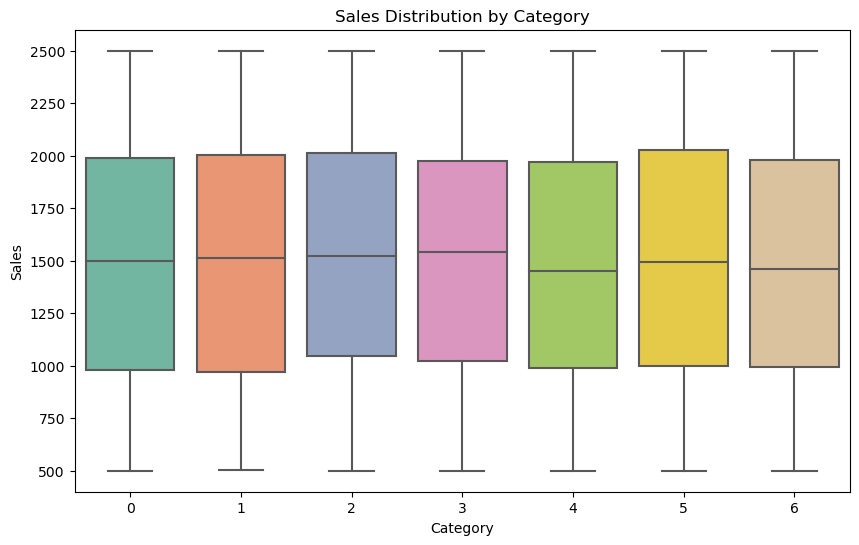

In [13]:
#Distribution of Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')

plt.show()

Sales Trends Over Time

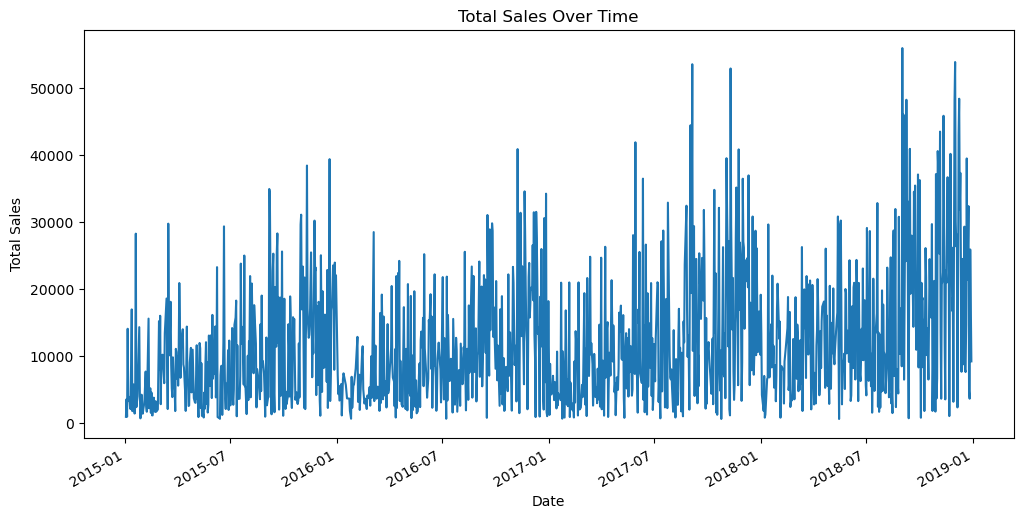

In [15]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

Correlation Heatmap

C:\Users\khura\AppData\Local\Temp\ipykernel_6952\1348244696.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


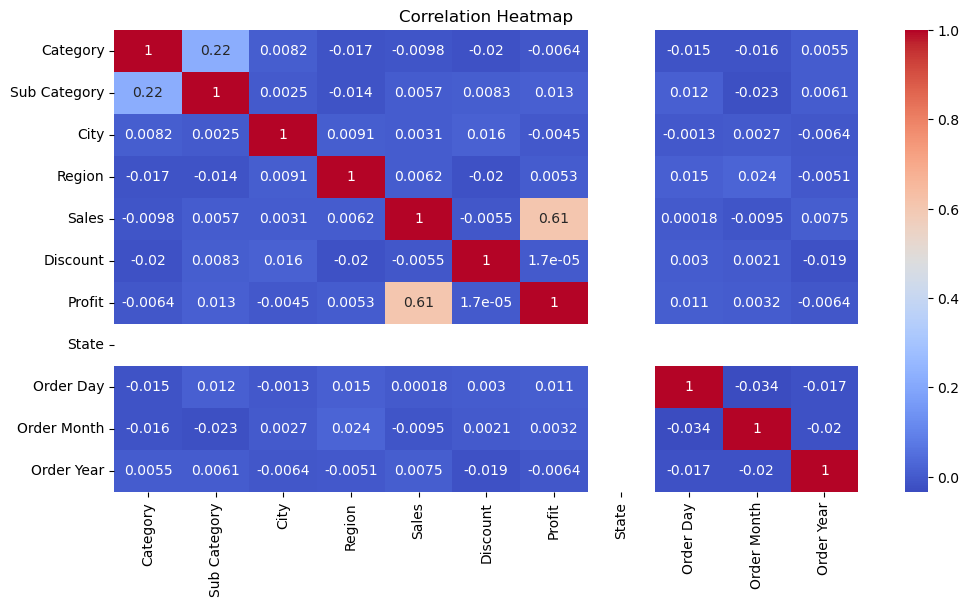

In [16]:
plt.figure(figsize=(12, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature Selection and Model Building

In [18]:
# Select features and target variable
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales'])
target = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train a Linear Regression Model

In [20]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Evaluate the Model
#Evaluate the model performance using Mean Squared Error (MSE) and R-squared.


In [21]:
# Calculate MSE and R-squared

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212954.08313440107
R-squared: 0.3543257711757313


Visualize the Results

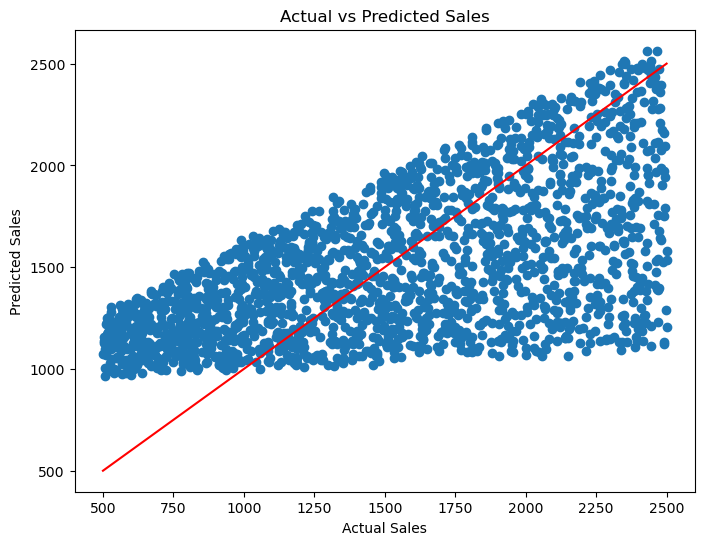

In [22]:
#Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features
degree = 2  # You can adjust the degree
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Make predictions
y_poly_pred = poly_model.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f'Polynomial Regression Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression R-squared: {r2_poly}')


Polynomial Regression Mean Squared Error: 213886.90546054277
Polynomial Regression R-squared: 0.35149746505829715


In [25]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_tree_pred = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_tree_pred)
r2_tree = r2_score(y_test, y_tree_pred)

print(f'Decision Tree Mean Squared Error: {mse_tree}')
print(f'Decision Tree R-squared: {r2_tree}')


Decision Tree Mean Squared Error: 416152.2711355678
Decision Tree R-squared: -0.26176870048245404


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')


Random Forest Mean Squared Error: 218499.10942006
Random Forest R-squared: 0.3375133179083125


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_gb_pred = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_gb_pred)
r2_gb = r2_score(y_test, y_gb_pred)

print(f'Gradient Boosting Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting R-squared: {r2_gb}')


Gradient Boosting Mean Squared Error: 211702.32783285168
Gradient Boosting R-squared: 0.35812107825371065
